*Importing necessary Libraries*

In [ ]:
import numpy as np
from numpy import mean
import pandas as pd
import seaborn as sb

import matplotlib.pyplot as plt

import sklearn

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
KFold

sklearn.model_selection._split.KFold

*Mounting drive and loading dataset*

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
titanic_df = pd.read_csv('/content/gdrive/MyDrive/8th sem/18CA312-Data Mining and Applications /titanic.csv')

#titanic_df = pd.read_csv('/content/titanic.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


*separating attributes and labels*

In [ ]:
y = titanic_df.Survived                                 # x = features ; y = class (i.e., survived = 0/1)
x = titanic_df.drop('Survived', axis=1)

In [ ]:
x.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

#1. Visualizing the data

In [ ]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic_df.head(10)

In [ ]:
titanic_df.info()
titanic_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

*What are the possible features that can contribute to higher survival in titanic?*

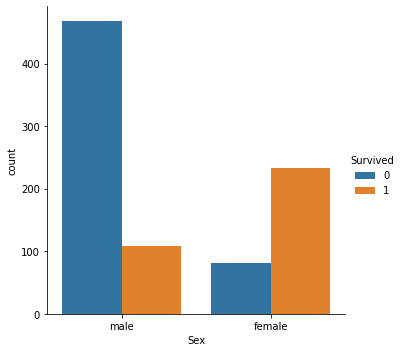

In [ ]:
# sex
sb.catplot(x ="Sex", hue ="Survived", kind ="count", data = titanic_df)

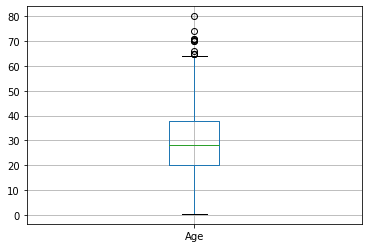

In [ ]:
titanic_df.boxplot(['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


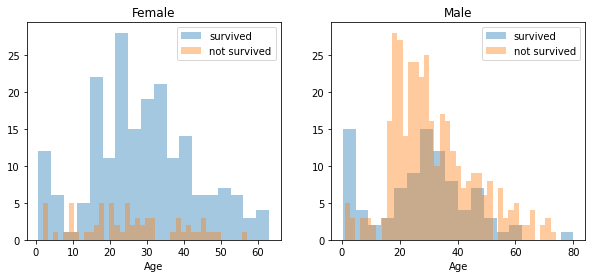

In [ ]:
# sex & age

survived = 'survived'
not_survived = 'not survived'

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
f = titanic_df[titanic_df['Sex']=='female']
m = titanic_df[titanic_df['Sex']=='male']

ax = sb.distplot(f[f['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sb.distplot(f[f['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')

ax = sb.distplot(m[m['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sb.distplot(m[m['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

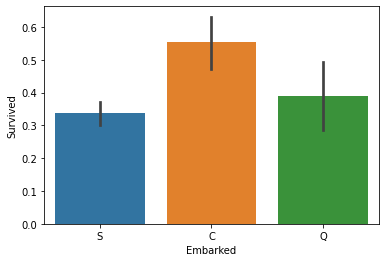

In [ ]:
# Points of Embarkment in journey: S: Southampton, U.K. > C: Cherbourg, France > Q: Queenstown, Ireland

sb.barplot(x = 'Embarked', y = 'Survived', data = titanic_df)

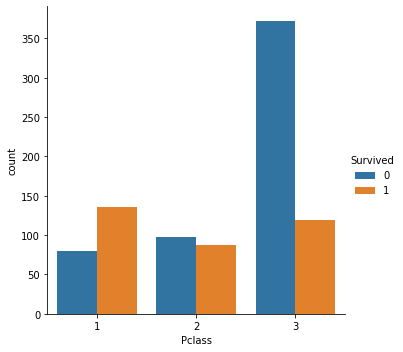

In [ ]:
# Pclass no. 1 & 2 = Deck A, B, C ; Pclass no. 3 = Deck E

sb.catplot(x ="Pclass", hue ="Survived", kind ="count", data = titanic_df)

In [ ]:
data = [titanic_df]
for dataset in data:
  dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
  dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
  dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
  dataset['not_alone'] = dataset['not_alone'].astype(int)
titanic_df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

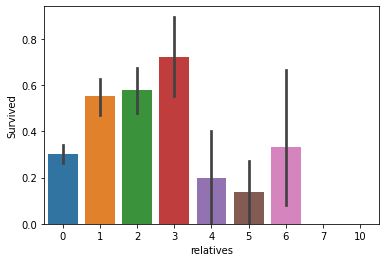

In [ ]:
sb.barplot(x='relatives', y='Survived', data = titanic_df)

#2. Data Preprocessing

In [ ]:
x.drop(columns=['PassengerId','Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [ ]:
lbl = LabelEncoder()
labels = lbl.fit_transform(x['Sex'])
x['Sex'] = labels                              # encoded sex (m, f) as int

labels = lbl.fit_transform(x['Embarked'])
x['Embarked'] = labels                         # encoded embarked (S, C, Q, NaN) as int

In [ ]:
x['Fare'] = x['Fare'].astype(int)              # converted float64 -> int64

In [ ]:
mean = x["Age"].mean()
                                               # replacing all the missing age values
                                               #              with mean of column age

std = x["Age"].std()                           # replacing all the missing age values
                                               # with random numbers b/w mean and std
is_null = x["Age"].isnull().sum()
rand_age = np.random.randint(mean-std, mean+std, size = is_null)

In [ ]:
#q1 = x.Age.quantile([0.25])                    # replacing all the missing age values
#q3 = x.Age.quantile([0.75])                    #    with random numbers b/w q1 and q3
#is_null = x["Age"].isnull().sum()
#rand_age = np.random.randint(q1, q3, size = is_null)

In [ ]:
age_temp = x["Age"].copy()
age_temp[np.isnan(age_temp)] = rand_age
x["Age"] = age_temp
x["Age"] = x["Age"].astype(int)

Creating categories

In [ ]:
bins = [0, 11, 18, 22, 27, 33, 40, 66, 100]
labels = [0, 1, 2, 3, 4, 5, 6, 7]
x['AgeGroup'] = pd.cut(x['Age'], bins = bins, labels = labels, right = False)

In [ ]:
bins = [0, 8, 15, 31, 99 , 250, 1000]
labels = [0, 1, 2, 3, 4, 5]
x['FareGroup'] = pd.cut(x['Fare'], bins = bins, labels = labels, right = False)

In [ ]:
#x.head(10)
x.info()
x.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Pclass     891 non-null    int64   
 1   Sex        891 non-null    int64   
 2   Age        891 non-null    int64   
 3   SibSp      891 non-null    int64   
 4   Parch      891 non-null    int64   
 5   Fare       891 non-null    int64   
 6   Embarked   891 non-null    int64   
 7   AgeGroup   891 non-null    category
 8   FareGroup  891 non-null    category
dtypes: category(2), int64(7)
memory usage: 51.2 KB


Pclass       0
Sex          0
Age          0
SibSp        0
Parch        0
Fare         0
Embarked     0
AgeGroup     0
FareGroup    0
dtype: int64

#3. Seperating Training data and Testing data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

print("shape of original Titanic dataset :", titanic_df.shape)
print("shape of input - training set", x_train.shape)
print("shape of output - training set", y_train.shape)
print("shape of input - testing set", x_test.shape)
print("shape of output - testing set", y_test.shape)

shape of original Titanic dataset : (891, 12)
shape of input - training set (712, 9)
shape of output - training set (712,)
shape of input - testing set (179, 9)
shape of output - testing set (179,)


#4. Machine Learning Model

K Nearest Neighbor 

In [ ]:
k = KNeighborsClassifier(n_neighbors = 5, metric = 'manhattan')
k.fit(x_train, y_train)

y_pred = k.predict(x_test)
#y_pred

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm                    # [ TN, FP
                      #   FN, TP ]

array([[86, 28],
       [29, 36]])

In [ ]:
k_acc = accuracy_score(y_test, y_pred)
k_prec = precision_score(y_test, y_pred)
k_re = recall_score(y_test, y_pred)

print('Accuracy: %.3f' % k_acc)
print('Precision: %.3f' % k_prec)
print('Recall: %.3f' % k_re)

Accuracy: 0.682
Precision: 0.562
Recall: 0.554


In [ ]:
# K Fold on KNN Model

cv = KFold(n_splits=5, random_state=1, shuffle=True)
kscores = cross_val_score(k, x, y, cv=cv)
k_score = mean(kscores)
print('Accuracy: %.3f' % k_score)

Accuracy: 0.731


Naive Bayes

In [ ]:
nb = GaussianNB()
nb.fit(x_train, y_train)

y_pred = nb.predict(x_test)
#y_pred

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[95, 19],
       [28, 37]])

In [ ]:
nb_acc = accuracy_score(y_test, y_pred)
nb_prec = precision_score(y_test, y_pred)
nb_re = recall_score(y_test, y_pred)

print('Accuracy: %.3f' % nb_acc)
print('Precision:  %.3f' % nb_prec)
print('Recall:  %.3f' % nb_re)

Accuracy: 0.737
Precision:  0.661
Recall:  0.569


In [ ]:
# K Fold on Naive Bayes Model

cv = KFold(n_splits=5, random_state=1, shuffle=True)
nbscores = cross_val_score(nb, x, y, cv=cv)
nb_score = mean(nbscores)
print('Accuracy: %.3f' % nb_score)

Accuracy: 0.771


Decision Tree

In [ ]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

y_pred = tree.predict(x_test)
#y_pred

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

In [ ]:
tree_acc = accuracy_score(y_test, y_pred)
tree_prec = precision_score(y_test, y_pred)
tree_re = recall_score(y_test, y_pred)

print('Accuracy: %.3f' % tree_acc)
print('Precision: %.3f' % tree_prec)
print('Recall: %.3f' % tree_re)

Accuracy: 0.704
Precision: 0.583
Recall: 0.646


In [ ]:
# K Fold on Decision Tree Model

cv = KFold(n_splits=5, random_state=1, shuffle=True)
treescores = cross_val_score(tree, x, y, cv=cv)
tree_score = mean(treescores)
print('Accuracy: %.3f' % tree_score)

Accuracy: 0.752


Support Vector Machine (SVM)

In [ ]:
sv = svm.SVC(kernel = 'linear')
sv.fit(x_train, y_train)

y_pred = sv.predict(x_test)
#y_pred

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[97, 17],
       [24, 41]])

In [ ]:
sv_acc = accuracy_score(y_test, y_pred)
sv_prec = precision_score(y_test, y_pred)
sv_re = recall_score(y_test, y_pred)

print('Accuracy: %.3f' % sv_acc)
print('Precision: %.3f' % sv_prec)
print('Recall: %.3f' % sv_re)

Accuracy: 0.771
Precision: 0.707
Recall: 0.631


In [ ]:
# K Fold on SVM Model

cv = KFold(n_splits=5, random_state=1, shuffle=True)
svscores = cross_val_score(sv, x, y, cv=cv)
sv_score = mean(svscores)
print('Accuracy: %.3f' % sv_score)

Accuracy: 0.787


*comparing the four models' scores*

In [ ]:
round_k = round(k_acc * 100, 2)
fin_k = round(k_score * 100, 2)
print('K-Nearest Neighbor >>')
print('Score before KFold:', round_k, '| Score after KFold:', fin_k)

round_nb = round(nb_acc * 100, 2)
fin_nb = round(nb_score * 100, 2)
print('Gaussian Naive Bayes >>') 
print('Score before KFold:', round_nb, '| Score after KFold:', fin_nb)

round_tree = round(tree_acc * 100, 2)
fin_tree = round(tree_score * 100, 2)
print('Decision Tree >>')
print('Score before KFold:', round_tree, '| Score after KFold:', fin_tree)

round_sv = round(sv_acc * 100, 2)
fin_sv = round(sv_score * 100, 2)
print('Support Vector Machine >>')
print('Score before KFold:', round_sv, '| Score after KFold:', fin_sv)

K-Nearest Neighbor >>
Score before KFold: 68.16  | Score after KFold: 73.07
Gaussian Naive Bayes >>
Score before KFold: 73.74 | Score after KFold: 77.11
Decision Tree >>
Score before KFold: 70.39 | Score after KFold: 75.19
Support Vector Machine >>
Score before KFold: 77.09 | Score after KFold: 78.68
